MNIST Digit Classification without any hidden layer using Numpy.

In [ ]:
!pip install idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy # for conversion into NumPy arrray
import gzip # for unziping the files stored locally on device.

!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

f1 = gzip.open('/content/data/train-images-idx3-ubyte.gz')
f2 = gzip.open('/content/data/train-labels-idx1-ubyte.gz')
f3 = gzip.open('/content/data/t10k-images-idx3-ubyte.gz')
f4 = gzip.open('/content/data/t10k-labels-idx1-ubyte.gz')

print(type(f1))
data1 = idx2numpy.convert_from_file(f1)
print(type(data1))
label = idx2numpy.convert_from_file(f2)
print(data1.shape)
print(label.shape)

In [ ]:
def softmax(x):
  expo = np.exp(x - x.max())
  expo = expo/np.sum(expo, keepdims = True, axis = 0)
  return expo

def d_softmax(x):
    exp_element = np.exp(x - x.max())
    exp_element = exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))
    return exp_element

In [ ]:
data_long=data1.reshape(data1.shape[0],784).T/255
print(data_long.shape)

prob_label=np.eye(10)[label].T
prob_label = prob_label.reshape(10,60000)
print(prob_label.shape)
print((prob_label[: , 5]))

W = np.random.randn(784,10)*0.001
b = 0
alpha = 0.5
cost = 0 
cost_func = [] 
accuracy = []

(784, 60000)
(10, 60000)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for i in range(0,300): 
  #Forward Prop
  Z = np.dot(W.T, data_long) + b
  A = softmax(Z)

  #Getting Output
  out = A.reshape(10,60000)
  guess = np.argmax(out, axis = 0)

  #Printing Output
  if i%10 == 0:
    print(label)
    print(guess)

  #Loss and Cost
  loss = -np.sum(prob_label*np.log(A + 0.000001) + (1-prob_label)*np.log(1-A + 0.000001), keepdims = True, axis = 0)
  cost = np.sum(loss, keepdims = True, axis = 1)/60000
  cost = float(np.squeeze(cost))
  cost_func.append(cost)
  if i%10==0:
    print(cost)

  #Getting Accuracy
  OH_out = (np.eye(10)[guess]).T  # one hot vector from guess
  acc = np.multiply(OH_out, prob_label)
  acc = np.sum(acc)/600
  accuracy.append(acc)

  if i%10 == 0:
    print(acc)

  #Backward Prop
  dZ = A - prob_label
  dW = np.dot(data_long, dZ.T)/60000
  db = np.sum(dZ, keepdims=True, axis=1)/60000
  W = W - alpha*dW
  b = b - alpha*db

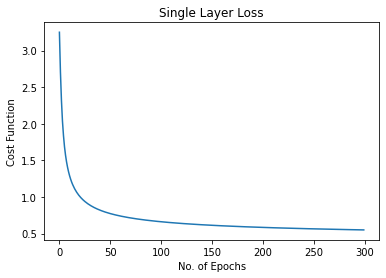

In [ ]:
plt.plot(cost_func)
plt.title("Single Layer Loss")
plt.xlabel('No. of Epochs')
plt.ylabel('Cost Function')
plt.show()

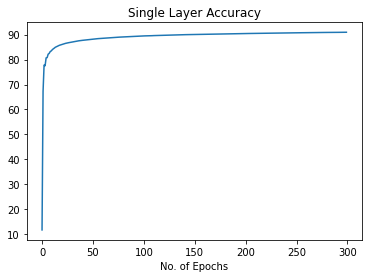

In [ ]:
plt.plot(accuracy)
plt.title("Single Layer Accuracy")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Percentage')
plt.show()